### Here, K =2
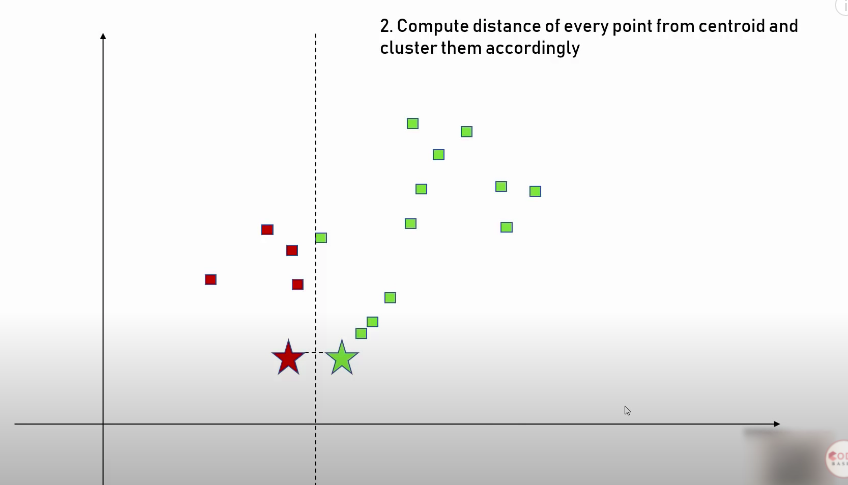

#### Gradually Develop the Center Points

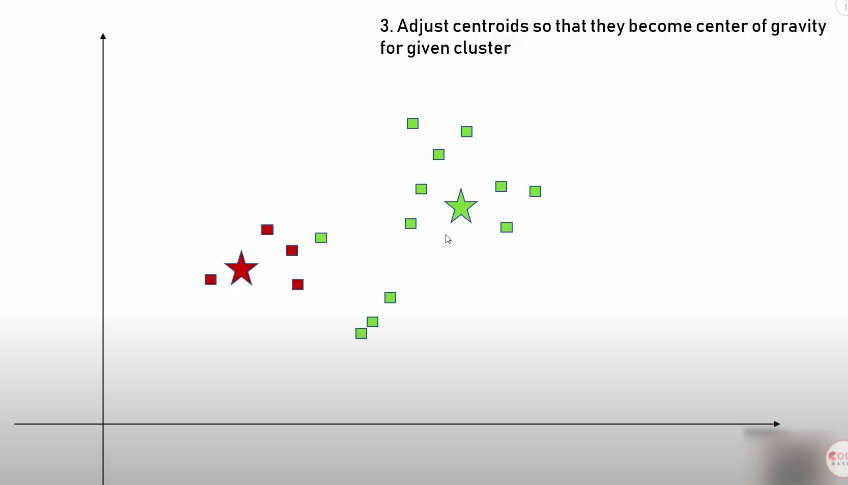

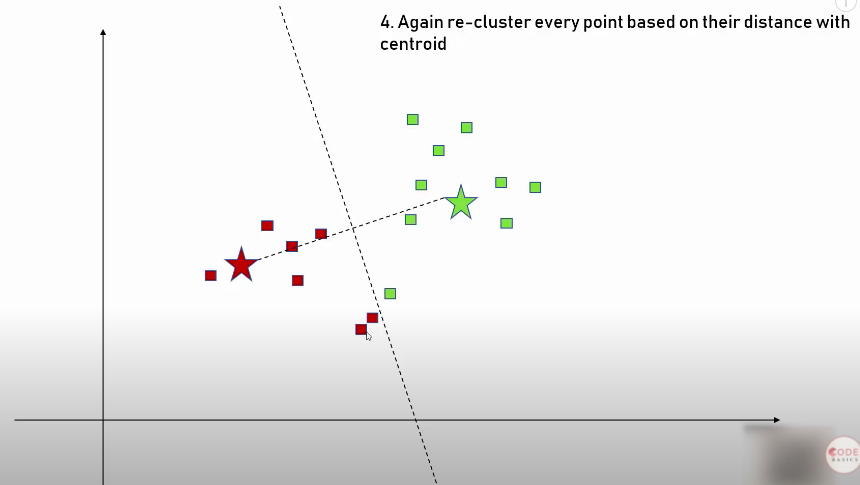

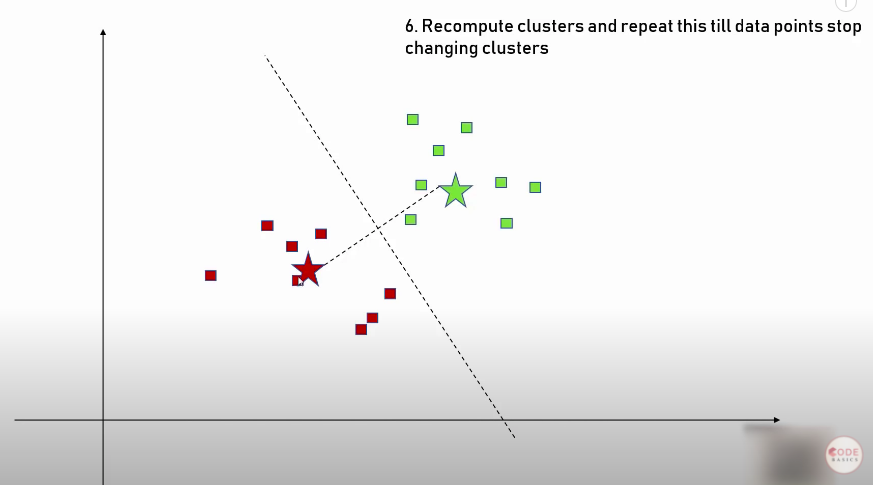

### Final Clusters
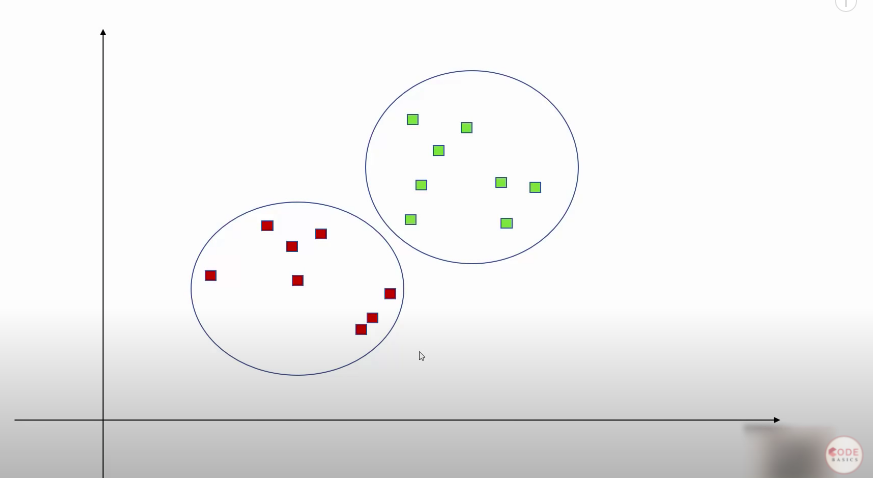

### Determining the Number of Clusters

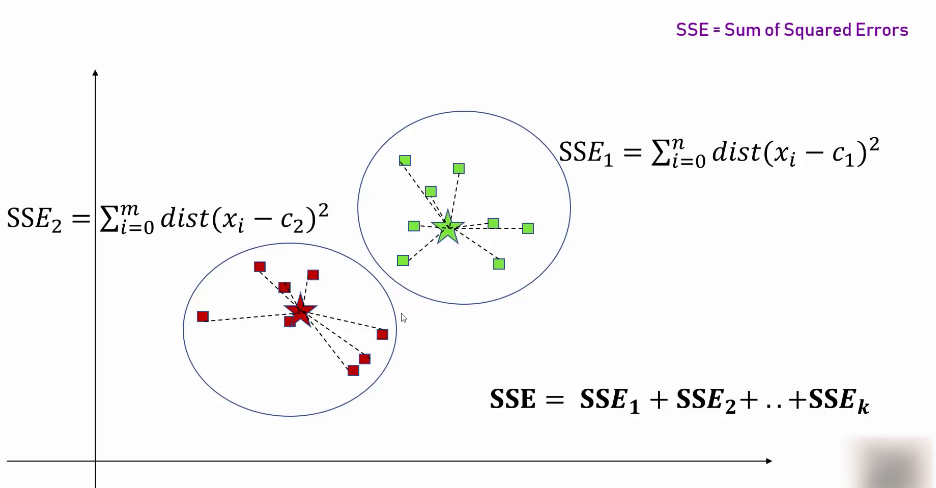

### Error VS Number of Clusters Graph 
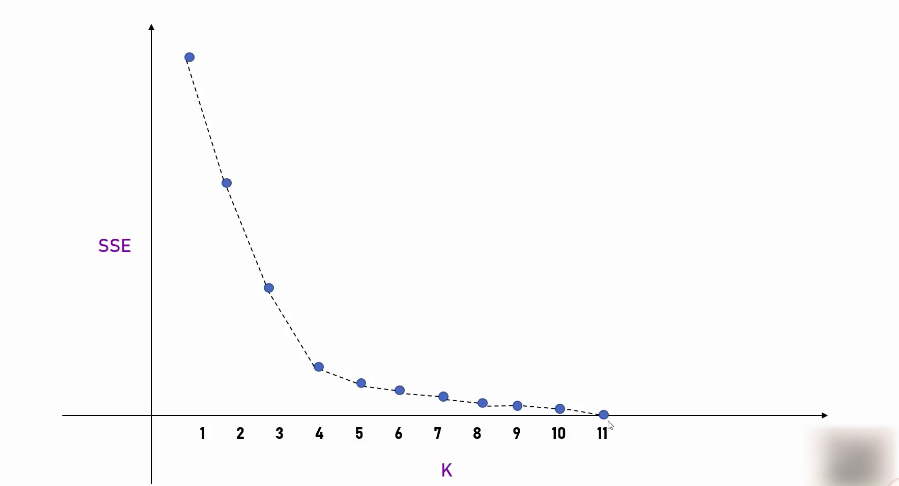

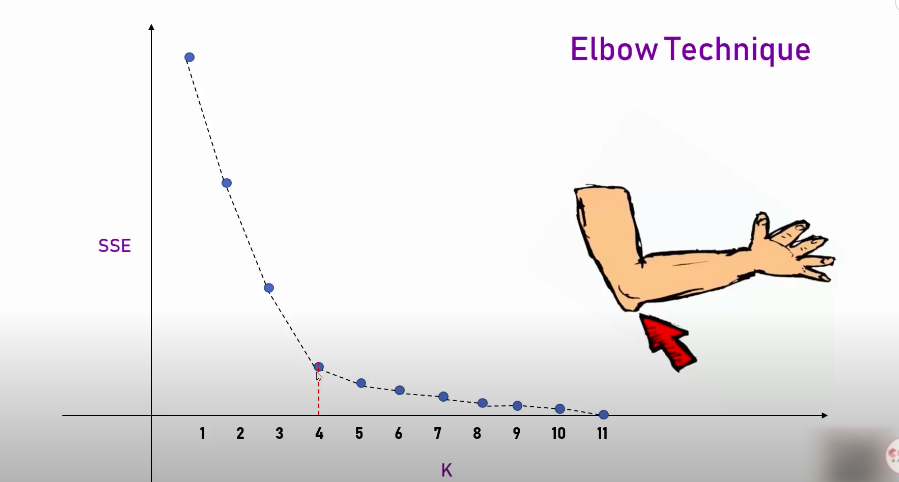

#### Importing Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#### Here NO Targert Group (Unsupervised)

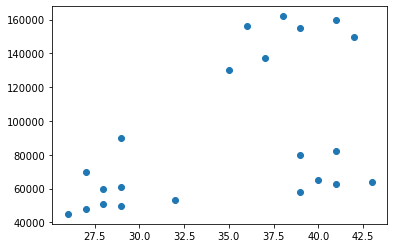

In [3]:
plt.scatter(df["Age"], df["Income($)"]) # 3 Cluster from the plot

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']]) # Only the numeric Columns
y_predicted 

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

### Created 3 clusters and add it to the df

In [6]:
df['cluster'] = y_predicted 
df.head(8)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1


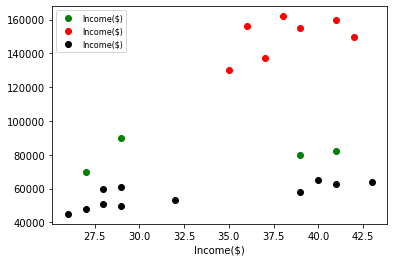

In [17]:
df1=df[df.cluster==0]  # Gives the row where the cluster value is 0, 
                       # along with the other column values like age, income
                       # 27 70000 0
df2=df[df.cluster==1] 
df3=df[df.cluster==2] 


lo = plt.scatter(df1.Age,df1['Income($)'], color='green')
ll = plt.scatter(df2.Age,df2['Income($)'], color='red')
l  = plt.scatter(df3.Age,df3['Income($)'], color='black')

plt.xlabel('Age')
plt.xlabel('Income($)')
plt.legend((lo, ll, l),
           ('Income($)', 'Income($)', 'Income($)'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=8)

plt.show()




#### Using MinMaxScaler because the plotting is not right and the X axis is much narrower.

#### Scaling the Income and make it narrower

In [21]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [22]:
scaler.fit(df[['Age']]) # Scaling also the Age 
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


### Again Making a model after Scaling

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [25]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


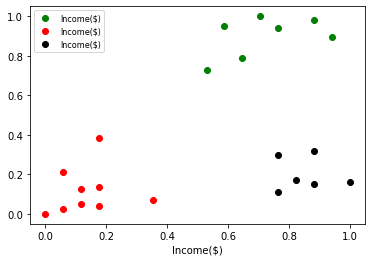

In [26]:
df1=df[df.cluster==0]  # Gives the row where the cluster value is 0, 
                       # along with the other column values like age, income
                       # 27 70000 0
df2=df[df.cluster==1] 
df3=df[df.cluster==2] 


lo = plt.scatter(df1.Age,df1['Income($)'], color='green')
ll = plt.scatter(df2.Age,df2['Income($)'], color='red')
l  = plt.scatter(df3.Age,df3['Income($)'], color='black')

plt.xlabel('Age')
plt.xlabel('Income($)')
plt.legend((lo, ll, l),
           ('Income($)', 'Income($)', 'Income($)'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=8)

plt.show()

### Now the clustering is pretty good

## Elblow technique (Finding the best K value)

In [29]:
k_rng =range(1,10) # values of k
sse = [] # sum square error
for k in k_rng:
    km = KMeans(n_clusters=k) # k starts with 1 and creates a new model
    km.fit(df[['Age', 'Income($)']]) # creating model
    sse.append(km.inertia_)  # determines the sse and appends the value

In [30]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668415,
 0.21578607765873017,
 0.16869711728567785,
 0.1327661931978319,
 0.10383752586603559]

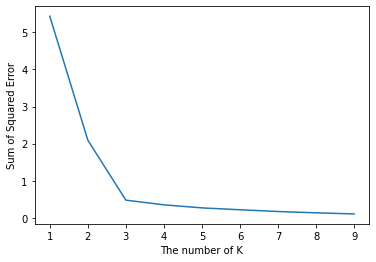

In [31]:
plt.xlabel('The number of K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse) # (x,y) = (k_rng, sse)